# Introduction to Natural Language Processing

In [1]:
!git clone https://github.com/alexisperrier/intro2nlp.git

Cloning into 'intro2nlp'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 93 (delta 44), reused 75 (delta 26), pack-reused 0
Receiving objects: 100% (93/93), 2.87 MiB | 20.14 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [2]:
!pip install wordcloud

In [1]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page 
    given a wikipedia page title
    '''
    params = { 
        'action': 'query', 
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts', 
        'explaintext': True
    }
    # send a request to the wikipedia api 
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content 
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"
 

In [2]:
# We lowercase the text to avoid having to deal with uppercase and capitalized words
text = wikipedia_page('Earth').lower()
print(text)

earth is the third planet from the sun and the only astronomical object known to harbor life. while large volumes of water can be found throughout the solar system, only earth sustains liquid surface water. about 71% of earth's surface is made up of the ocean, dwarfing earth's polar ice, lakes, and rivers. the remaining 29% of earth's surface is land, consisting of continents and islands. earth's surface layer is formed of several slowly moving tectonic plates, interacting to produce mountain ranges, volcanoes, and earthquakes. earth's liquid outer core generates the magnetic field that shapes earth's magnetosphere, deflecting destructive solar winds.
earth's atmosphere consists mostly of nitrogen and oxygen. greenhouse gases in the atmosphere like carbon dioxide (co2) trap a part of the energy from the sun close to the surface. water vapor is widely present in the atmosphere and forms clouds that cover most of the planet. more solar energy is received by tropical regions than polar re

In [3]:
import requests
# this is the url for Alice in Wonderland
result = requests.get('http://www.gutenberg.org/files/11/11-0.txt')
print(result.text)

ï»¿The Project Gutenberg eBook of Aliceâs Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Aliceâs Adventures in Wonderland

Author: Lewis Carroll

Release Date: January, 1991 [eBook #11]
[Most recently updated: October 12, 2020]

Language: English

Character set encoding: UTF-8

Produced by: Arthur DiBianca and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK ALICEâS ADVENTURES IN WONDERLAND ***

[Illustration]




Aliceâs Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down t

In [4]:
emotion = wikipedia_page('Emotion').lower()
print(emotion)

emotions are mental states brought on by neurophysiological changes, variously associated with thoughts, feelings, behavioural responses, and a degree of pleasure or displeasure. there is currently no scientific consensus on a definition. emotions are often intertwined with mood, temperament, personality, disposition, or creativity.research on emotion has increased over the past two decades with many fields contributing including psychology, medicine, history, sociology of emotions, and computer science. the numerous theories that attempt to explain the origin, function and other aspects of emotions have fostered more intense research on this topic. current areas of research in the concept of emotion include the development of materials that stimulate and elicit emotion. in addition, pet scans and fmri scans help study the affective picture processes in the brain.from a mechanistic perspective, emotions can be defined as "a positive or negative experience that is associated with a part

In [5]:
# import the wordcloud library
from wordcloud import WordCloud
# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
        stopwords = [])
# Apply the wordcloud to the text.
wordcloud.generate(emotion)

(-0.5, 599.5, 299.5, -0.5)

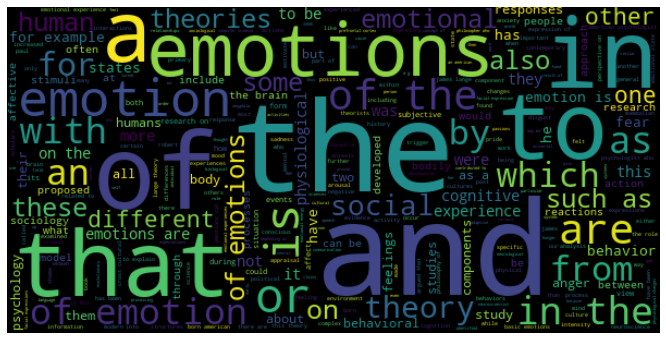

In [6]:
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (12,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

## Remove Stop Words From a Block of Text

#### Count Word Frequencies

In [7]:
import requests
text = wikipedia_page('Earth').lower()
print(text[:200] + '...')

earth is the third planet from the sun and the only astronomical object known to harbor life. while large volumes of water can be found throughout the solar system, only earth sustains liquid surface ...


In [9]:
from collections import Counter
# we transform the text into a list of words 
# by splitting over the space character ' '
word_list = text.split(' ')
# and count the words
word_counts = Counter(word_list)
word_counts

Counter({'earth': 71,
         'is': 171,
         'the': 687,
         'third': 2,
         'planet': 9,
         'from': 71,
         'sun': 26,
         'and': 276,
         'only': 14,
         'astronomical': 4,
         'object': 3,
         'known': 8,
         'to': 168,
         'harbor': 1,
         'life.': 2,
         'while': 4,
         'large': 11,
         'volumes': 1,
         'of': 344,
         'water': 25,
         'can': 19,
         'be': 22,
         'found': 7,
         'throughout': 1,
         'solar': 41,
         'system,': 2,
         'sustains': 1,
         'liquid': 6,
         'surface': 43,
         'water.': 3,
         'about': 44,
         '71%': 1,
         "earth's": 105,
         'made': 2,
         'up': 10,
         'ocean,': 7,
         'dwarfing': 1,
         'polar': 9,
         'ice,': 1,
         'lakes,': 2,
         'rivers.': 1,
         'remaining': 4,
         '29%': 1,
         'land,': 2,
         'consisting': 4,
         'continen

In [10]:
# Here is the list of 20 most common words with  word_counts.most_common(20)

for w in word_counts.most_common(20):
    print(f"{w[0]}:  \t{w[1]} ")

the:  	687 
of:  	344 
and:  	276 
is:  	171 
to:  	168 
in:  	146 
a:  	128 
earth's:  	105 
earth:  	71 
from:  	71 
with:  	68 
by:  	67 
as:  	66 
that:  	60 
at:  	56 
are:  	52 
about:  	44 
surface:  	43 
solar:  	41 
it:  	40 


#### Remove Stop Words

In [30]:
# transform the text into a list of words
words_list = text.split(' ')

# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 
             'with', 'this', 'as', 'an', 'are','its', 'at', 'for']

# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word not in stopwords ]

In [21]:
Counter(words_without_stopwords).most_common(20)

[("earth's", 105),
 ('earth', 71),
 ('about', 44),
 ('surface', 43),
 ('solar', 41),
 ('it', 40),
 ('on', 38),
 ('million', 36),
 ('have', 35),
 ('which', 32),
 ('or', 30),
 ('has', 29),
 ('into', 28),
 ('life', 27),
 ('sun', 26),
 ('water', 25),
 ('atmosphere', 25),
 ('than', 25),
 ('other', 24),
 ('over', 24)]

In [22]:
#The wordcloud library comes with a predefined list of 192 stop words.  
print(list(WordCloud().stopwords)[:20])

['there', 'my', 'this', 'an', 'but', 'hence', "isn't", 'no', 'how', "didn't", 'when', "let's", 'yourself', 'here', 'and', 'most', "they've", 'ours', "who's", 'your']


In [34]:
#words_without_stopwords.char_tokens()

In [ ]:
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
        stopwords = [])

wordcloud.generate(words_without_stopwords)

import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (12,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

TypeError: expected string or bytes-like object

#### Use a Predefined List of Stop Words

There is no fixed or optimal list of stop words in any language; they depend on your text context. For example, temperature numbers would be significant for a text about the weather, but less so for a text about songs or legal documents.

In [35]:
print(list(WordCloud().stopwords)[:20])

['there', 'my', 'this', 'an', 'but', 'hence', "isn't", 'no', 'how', "didn't", 'when', "let's", 'yourself', 'here', 'and', 'most', "they've", 'ours', "who's", 'your']


- Transforming a text into a list of words is called tokenization, and each word is a token.

- A simple way to tokenize is to split the text over whitespaces with  text.split(' ')  .
- By default, if you do not specify a stopword  parameter value, the wordcloud  library uses the built-in list of 192 stop words.


## Apply Tokenization Techniques

#### The Meaning of Tokenization
The process of transforming a text into a list of words is called tokenization, and words are called tokens. In other words, tokenization chops up a text into pieces called tokens. 

#### Discover NLTK
NLTK offers several tokenizers, all part of the Tokenizer package, found in the NLTK documentation. Some are dedicated to a particular type of text—for instance,  TweetTokenizer  handles tweets, and  WordPunctTokenizer  handles punctuation. We will use the latter for this course. Let's see how it performs on a simple text.

In [40]:
from nltk.tokenize import WordPunctTokenizer
tokens = WordPunctTokenizer().tokenize("Let's eat your soup, Grandpa.")
tokens

['Let', "'", 's', 'eat', 'your', 'soup', ',', 'Grandpa', '.']

In [41]:
from nltk.tokenize import WordPunctTokenizer

text = wikipedia_page('Earth')
tokens = WordPunctTokenizer().tokenize(text)
print(Counter(tokens).most_common(20))

[('the', 626), (',', 580), ('.', 483), ('of', 342), ('and', 280), ('Earth', 240), ('is', 173), ('to', 168), ('s', 149), ("'", 148), ('in', 137), ('a', 127), ('(', 107), ('The', 94), ('-', 78), ('from', 67), ('with', 67), ('by', 63), ('that', 60), ('as', 60)]


In [30]:
# example of character tokenization
char_tokens = [ c for c in text ]
print(Counter(char_tokens).most_common(10))

[(' ', 8703), ('e', 5147), ('t', 4048), ('a', 3938), ('i', 3155), ('o', 3119), ('r', 2951), ('n', 2915), ('s', 2879), ('h', 2130)]



The type of tokens you use depends on the task. Character tokenization works best for spell checking. Word tokens are the most common, and subword tokenization is used in recent `NLP models such as BERT`.

#### Tokenize on N-Grams

Some words are better understood together. For instance, deep learning, New York, love at first sight, or The New England Journal of Medicine. Therefore, when tokenizing a text, it can be useful to consider groups of two words (bigrams) or three words (trigrams), etc. In general, groups of words taken as a single token are called n-grams.

In [42]:
from nltk import ngrams
from nltk.tokenize import WordPunctTokenizer

text = "How much wood would a woodchuck chuck if a woodchuck could chuck wood?"

# Tokenize
tokens = WordPunctTokenizer().tokenize(text)

# bigrams 
bigrams = [w for w in  ngrams(tokens,n=2)]
print(bigrams)

[('How', 'much'), ('much', 'wood'), ('wood', 'would'), ('would', 'a'), ('a', 'woodchuck'), ('woodchuck', 'chuck'), ('chuck', 'if'), ('if', 'a'), ('a', 'woodchuck'), ('woodchuck', 'could'), ('could', 'chuck'), ('chuck', 'wood'), ('wood', '?')]


In [43]:
# trigrams
trigrams = ['_'.join(w) for w in  ngrams(tokens,n=3)]
print(trigrams)

['How_much_wood', 'much_wood_would', 'wood_would_a', 'would_a_woodchuck', 'a_woodchuck_chuck', 'woodchuck_chuck_if', 'chuck_if_a', 'if_a_woodchuck', 'a_woodchuck_could', 'woodchuck_could_chuck', 'could_chuck_wood', 'chuck_wood_?']


In [44]:
# You can create new multi words tokens by joining the n-grams over "_":

bi_tokens = ['_'.join(w) for w in bigrams]
print(bi_tokens)

['How_much', 'much_wood', 'wood_would', 'would_a', 'a_woodchuck', 'woodchuck_chuck', 'chuck_if', 'if_a', 'a_woodchuck', 'woodchuck_could', 'could_chuck', 'chuck_wood', 'wood_?']


#### Let's Recap!

- Splitting on whitespaces does not take into account punctuation or contractions and does not scale.

- NLTK offers several tokenizers, all part of the Tokenizer package, found in the NLTK documentation. Some are dedicated to a particular type of text so choose the one that fits best.  

- Tokenization is not limited to words. For certain use cases and recent models, character or syllable based tokens are more efficient.

- N-grams are groups of words taken as a single token. You can generate them with  NLTK.ngrams()  .

- Always keep in mind that the size of the vocabulary directly impacts the necessary computing power. 

## Create a Unique Word Form With SpaCy

A **root word** with different possible endings generate **multiple    word forms**. 

But...why do you need a **single word form** for each meaningful word in the text? 

A single word form will improve `word frequency calculations` relevance, reduce the vocabulary size, and lead to better visualizations, classifications, and analysis. 

You can reduce a word's variant to a unique form with two different methods: `stemming or lemmatization`. 



#### Stem Words (Remove the Suffix of a Word)

Stemming is the process of removing the suffix of a word based on the assumption that different word forms (i.e., lightning, lightly, lighting) consist of a root word (light) and an ending (+ning, + ly, + ing).

Although words may contain prefixes and suffixes, stemming removes suffixes. And it does so rather brutally!

Let's see how to apply stemming to Wikipedia's Earth page. First, tokenize the text, and for each token, extract the stem of the word.

In [50]:
#from nltk.tokenize WordPunctTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Get the text, for instance from Wikipedia. 
# see chap 1 for the wikipedia_page function
text    = wikipedia_page('Earth').lower()

# Tokenize and remove stopwords
tokens  = WordPunctTokenizer().tokenize(text)
tokens = [tk for tk in tokens if tk not in stopwords.words('english')]

# Instantiate a stemmer
ps = PorterStemmer()

# and stem
stems   = [ps.stem(tk) for tk in tokens ]
print(stems[:50])

['earth', 'third', 'planet', 'sun', 'astronom', 'object', 'known', 'harbor', 'life', '.', 'larg', 'volum', 'water', 'found', 'throughout', 'solar', 'system', ',', 'earth', 'sustain', 'liquid', 'surfac', 'water', '.', '71', '%', 'earth', "'", 'surfac', 'made', 'ocean', ',', 'dwarf', 'earth', "'", 'polar', 'ice', ',', 'lake', ',', 'river', '.', 'remain', '29', '%', 'earth', "'", 'surfac', 'land', ',']


In [52]:
import numpy as np
np.random.choice(stems, size = 50)

array(['surfac', 'geographi', 'star', 'result', 'chang', 'soil', 'sq',
       'collis', 'partit', 'toward', 'today', '600', 'form', '.',
       'ancient', 'moon', 'specif', 'numer', ',', 'initi', 'half',
       'coldest', '23', ',', ',', 'mani', '2', 'magnet', 'land', 'deep',
       'converg', 'land', ',', 'compos', "'", 'geoid', 'includ', "'",
       'global', 'approxim', 'water', 'topsoil', 'earth', 'preced',
       'element', 'day', 'month', 'charon', 'ocean', '5'], dtype='<U15')

Stemming is a bit crude, and you want more than just the rough root of the word. For that, you use lemmatization.

#### Lemmatize Words (Reduce Words to a Canonical Form)

The lemma is the word form you would find in a dictionary. The word universities is found under university, while universe is found under universe—no room for misinterpretation. A lemma is also called the canonical form of a word.

`Lemmatization` is the process of reducing multiple variants of a word to its unique lemma. It is more readable and interpretable and less brutal than stemming. It is also slower.

A lemmatizer not only finds the most appropriate and essential version of a word; it **also looks at the grammatical role** in the sentence to find its canonical form.

#### Tokenize and Lemmatize With SpaCy

The spacy.io library is a must-have for all NLP practitioners. The library covers several low-level tasks such as tokenization, lemmatization, and part-of-speech (POS) tagging. It also offers named entity recognition (NER) and embeddings for dozens of languages.

- `Embeddings` are a vector representation of words with nice similarity features that you'll see in Part 3 of this course.

- `Part-of-speech tagging (POS)` is the task of finding the words' grammatical nature in a sentence, such as nouns, verbs, and adjectives. 

- `Named-entity recognition (NER)` identifies persons, places, and organizations in a text. 

Tokenize with **Spacy**

In [56]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Roads? Where we’re going we don’t need roads!")
for token in doc:
    print(token) 

Roads
?
Where
we
’re
going
we
do
n’t
need
roads
!


Each element of the doc object holds information on the nature and style of the token:

- is_space: is the token a space.  

- is_punct:  is the token a punctuation sign.

- is_upper:  is the token all uppercase.

- is_digit: is the token a number.

- is_stop: is the token a stop word.

In [57]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("All aboard! \t Train NXH123 departs from platform 22 at 3:16 sharp.")

for token in doc:
    print(token, token.is_space, token.is_punct, token.is_upper, token.is_digit)

All False False False False
aboard False False False False
! False True False False
	  True False False False
Train False False False False
NXH123 False False True False
departs False False False False
from False False False False
platform False False False False
22 False False False True
at False False False False
3:16 False False False False
sharp False False False False
. False True False False


**Lemmatize** With SpaCy

In [58]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("I came in and met with her teammates at the meeting.")

for token in doc:
    print(f"{token.text}\t {token.lemma_} ")

I	 I 
came	 come 
in	 in 
and	 and 
met	 meet 
with	 with 
her	 her 
teammates	 teammate 
at	 at 
the	 the 
meeting	 meeting 
.	 . 


## Extract Information With Regular Expression

So far, you've seen clean text. But in the wild world of online texts and social media, you have to deal with a lot more noise: HTML tags when you scrape a page, emojis in tweets, accents in French, URLs, and emails everywhere, among others. You may need to get rid of these!

Let's start with something simple yet useful, extracting #hashtags from a social media corpus (tweets, Instagram, etc.).

#### Extract Hashtags

Imagine that you want to extract all of the #hastags from a collection of tweets. More precisely, you want to find all the strings that start with the # sign and between word boundaries such as spaces, tabs, line returns, etc.

In [59]:
# the source text
text = ' _ _ _ _ _ ... '

# 1. import the regex library
import re

# 2. define the pattern
pattern = r'#\S+'


# 3. find all the strings that match the pattern with the findall method
re.findall(pattern, text)

[]

In [60]:
# the corpus of tweets
tweets = [
   'An #autumn scene showing a beautiful #horse coming to visit me.', 
'My new favourite eatery in #liverpool and I mean superb! #TheBrunchClub #breakfast #food', 
'#nowplaying Pointer Sisters - Dare Me | #80s #disco #funk #radio']
    
# and the hashtag extraction
import re
pattern = r'#\S+'
for text in tweets:
    print(re.findall(pattern, text))

['#autumn', '#horse']
['#liverpool', '#TheBrunchClub', '#breakfast', '#food']
['#nowplaying', '#80s', '#disco', '#funk', '#radio']


Another strategy to extract hashtags could be to simply tokenize the text and keep only the tokens that start with #. However, this method would not be applicable to detect more complex string patterns such as emails, URLs, list of words, etc.

#### Extract @Usernames

Usernames which start with a `@ sign` can be extracted in just the same way. You only have to replace the `# sign` by the `@ sign` in the definition of the regex.

In [61]:
import re

text = 'Check out this new NLP course on @openclassrooms by @alexip'
    
# change the pattern # -> @
pattern = r'@\S+' 

print(re.findall(pattern, text))

['@openclassrooms', '@alexip']


#### Identify a Regex

Regex stands for a regular expression. It is a sequence of characters that defines a search pattern. The pattern allows you to match, extract, or modify text.

#### Remove HTML Tags

Let's apply the re.sub function to remove all the HTML tags from an HTML page.

Say you have downloaded a web page, and you want to pull out the text from the page without all the HTML markup. You can use regex for that by defining a pattern that finds all the strings contained between a < and a >  :r'<[^>]*>' 

In [78]:
import requests
import re

# Music is in the House!
url = 'https://en.wikipedia.org/wiki/House_music'

# GET the content 
# Note: requests.get().content returns a byte object 
# that we can cast as string with .decode('UTF-8')
html = requests.get(url).content.decode('UTF-8')
print(html[:300])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>House music - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDate


In [79]:
# remove the header part of the html 
html = html.split('</head>')[1]
print(html[:300])


<body class="skin-vector-legacy mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-House_music rootpage-House_music skin-vector action-view vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sideb


In [80]:
# and remove all the html tags
text = re.sub("<[^>]*>",' ', html)
#text

In [81]:
print(text[:300])


   
  
 
	  
	    -->  
	 
	 
	  House music  
	 
		 From Wikipedia, the free encyclopedia 
		  
		  
		
		  
		 Jump to navigation 
		 Jump to search 
		   .mw-parser-output .hatnote{font-style:italic}.mw-parser-output div.hatnote{padding-left:1.6em;margin-bottom:0.5em}.mw-parser-output .hatnote i


#### Extract URLs

In [82]:
import requests, re
url = 'https://en.wikipedia.org/wiki/House_music'
# GET, decode and drop header
html = requests.get(url).content.decode('UTF-8').split('</head>')[1]
print(html)


<body class="skin-vector-legacy mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-House_music rootpage-House_music skin-vector action-view vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-sticky-header-edit-disabled vector-feature-table-of-contents-legacy-toc-disabled vector-feature-visual-enhancement-next-disabled vector-feature-article-tools-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled"><div id="mw-page-base" class="noprint"></div>
<div id="mw-head-base" class="noprint"></div>
<div id="content" class="mw-body" role="main">
	<a id="top"></a>
	<div id="siteNotice"><!-- CentralNotice --><!--esi <esi:include src="/esitest-fa8a495983347898/content" /> --> </div>
	<div class="mw-indicators">
	</div>
	<h1 id="firstHeading" class="firstHeading mw-first-heading"><span class=

In [83]:
# find all the urls
pattern = r'http.+?(?="|<)'
urls = re.findall(pattern, html)
print(urls[:5])

['https://en.wiktionary.org/wiki/proto-#Prefix', 'http://backtothezone.com', 'http://www.allmusic.com/subgenre/house-ma0000002651', 'https://web.archive.org/web/20121006233620/http://www.allmusic.com/subgenre/house-ma0000002651', 'http%3A%2F%2Fwww.allmusic.com%2Fsubgenre%2Fhouse-ma0000002651&amp;rfr_id=info%3Asid%2Fen.wikipedia.org%3AHouse+music']



#### Precompile a Regex Pattern

In [54]:
import re
pattern = re.compile(r'@\S+')
re.findall(pattern, text)

['@media(min-width:500px){.mw-parser-output',
 '@media(min-width:720px){.mw-parser-output',
 '@media(max-width:719px){.mw-parser-output',
 '@media(min-width:720px){.mw-parser-output',
 '@media',
 '@context":"https:\\/\\/schema.org","@type":"Article","name":"House',
 '@type":"Organization","name":"Contributors',
 '@type":"Organization","name":"Wikimedia',
 '@type":"ImageObject","url":"https:\\/\\/www.wikimedia.org\\/static\\/images\\/wmf-hor-googpub.png"}},"datePublished":"2001-10-11T18:42:04Z","dateModified":"2022-09-18T20:09:19Z","headline":"electronic',
 '@context":"https:\\/\\/schema.org","@type":"Article","name":"House',
 '@type":"Organization","name":"Contributors',
 '@type":"Organization","name":"Wikimedia',
 '@type":"ImageObject","url":"https:\\/\\/www.wikimedia.org\\/static\\/images\\/wmf-hor-googpub.png"}},"datePublished":"2001-10-11T18:42:04Z","dateModified":"2022-09-18T20:09:19Z","headline":"electronic']

#### Let's Recap!

A `regex` is a sequence of characters that define a search pattern that can match, locate, and manage text.

- You can use pre-defined regex to extract simple text elements, such as usernames or hashtags. In this chapter, you learned some of the most common patterns and how to use them to extract information from a text.

- You can also use regex to clean up the text by removing unwanted tags and more complex elements.

- Regex is blazing fast and can be used from the command line in most programming languages. 

In [77]:
import requests
result = requests.get('http://www.gutenberg.org/files/36/36-0.txt')
# This line to remove the header and footer
text = result.text[840:].split("*** END")[0]
# This line to remove all the weird non ascii characters 
text = text.encode('ascii',errors='ignore').decode('utf-8')

In [78]:
print(text[:230])

 Wells




   But who shall dwell in these worlds if they be inhabited?
    . . . Are we or they Lords of the World? . . . And
    how are all things made for man?
                    KEPLER (quoted in _The Anatomy of Mela


In [74]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/awf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Split the text along whitespaces, and lowercase the tokens.

How many distinct words do you have?

In [79]:
# tokenize and lowercase
tokens = [txt.lower() for txt in text.split()]
print(f"{len(set(tokens))} unique lowercase tokens")

10046 unique lowercase tokens


#### Define the following character tokenizer function:

In [84]:
tokens = [txt for txt in text.split()]

def chartokenizer(token):
    return [c for c in token]


chars = []
for tk in tokens:
    chars += chartokenizer(tk)

# all the lowercased characters
lowercase_chars = [c.lower() for c in chars]

# total number of characters
number_chars = len(chars)

# total number of unique characters
number_unique_chars = len(set(chars))

# total number of unique lowercase characters
number_unique_lowercase_chars = len(set(lowercase_chars))

print(number_chars)
print(number_unique_chars)
print(number_unique_lowercase_chars)

274677
70
44


Look at the 20 most commons tokens obtained with the NLTK WordPunctTokenizer.

#### Which of the following assertions are true?

In [87]:
from nltk.tokenize import WordPunctTokenizer
from collections import Counter

tokens = WordPunctTokenizer().tokenize(text)
len(tokens)

68580

In [91]:
from nltk.tokenize import WordPunctTokenizer

from collections import Counter

tokens = WordPunctTokenizer().tokenize(text)
tokens_count = Counter(tokens)
len(tokens_count)

7545

In [92]:
print("20 most common tokens:\n",tokens_count.most_common(20))

20 most common tokens:
 [('the', 4399), (',', 4134), ('.', 3141), ('and', 2358), ('of', 2284), ('a', 1529), ('I', 1264), ('to', 1157), ('in', 920), ('was', 850), ('that', 739), ('had', 565), ('it', 483), ('with', 435), ('my', 411), ('as', 402), ('at', 369), ('were', 368), ('on', 360), ('The', 346)]


In [100]:
print(f"\n tokens_count['the'] + \
tokens_count['The'] = {tokens_count['the'] + tokens_count['The'] } which is less than 5000 ")


 tokens_count['the'] + tokens_count['The'] = 4745 which is less than 5000 


In [101]:
total_token_count = len(tokens)

print(total_token_count)

68580


In [106]:
top_10_count = 0

for tk in tokens_count.most_common(10):
    top_10_count += tk[1]
    top_10_count
    
assert top_10_count > 0.25 * total_token_count

In [107]:
top_10_count

22036

## Question 4
#### Now remove the stop words from the text using:

In [108]:
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
stopwords = stopwords.words("english")

In [109]:
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from collections import Counter

stopwords = stopwords.words("english")

tokens = [tk.lower() for tk in tokens if tk.lower() not in stopwords]
Counter(tokens).most_common(20)

[(',', 4134),
 ('.', 3141),
 ('-', 321),
 (';', 243),
 ('!', 202),
 ('one', 196),
 ('upon', 171),
 ('martians', 167),
 ('said', 166),
 ('people', 158),
 ('came', 150),
 ('saw', 131),
 ('towards', 129),
 ('black', 122),
 ('?', 121),
 ('time', 120),
 ('man', 119),
 ('could', 116),
 ('little', 112),
 ('road', 104)]

## Question 5
#### Load the small English spaCy model:

In [110]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [111]:
import spacy
nlp = spacy.load("en_core_web_sm")


doc = nlp(text)
lemmas = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
lemmas[:10]

[' ',
 'Wells',
 '\r\n\r\n\r\n\r\n\r\n   ',
 'shall',
 'dwell',
 'world',
 'inhabit',
 '\r\n    ',
 'Lords',
 'World']

In [112]:
capitalized = [tk for tk in lemmas if tk.capitalize() == tk]
Counter(capitalized).most_common(20)

[('\r\n', 4376),
 ('\r\n\r\n', 853),
 ('Martians', 163),
 ('London', 56),
 ('Martian', 47),
 ('Mars', 42),
 ('Heat', 37),
 ('Ray', 34),
 ('Woking', 33),
 ('\r\n\r\n\r\n\r\n\r\n', 31),
 ('\r\n\r\n\r\n', 30),
 ('Hill', 29),
 ('\r\n ', 25),
 ('Weybridge', 25),
 ('Horsell', 23),
 ('Street', 23),
 ('Ogilvy', 20),
 ('God', 20),
 ('Sunday', 20),
 ('Thames', 20)]

## Question 6
#### Use the following regex to find all the composite words (words composed of two words separated with a hyphen).

In [113]:
import re
rgx = r'\b\w+[-]\w+\b'

In [116]:
import re
rgx = r'\b\w+[-]\w+\b'
composites = re.findall(rgx, text)
#composites

In [117]:
Counter(composites).most_common(20)

[('Heat-Ray', 33),
 ('handling-machine', 15),
 ('sand-pits', 14),
 ('fighting-machine', 10),
 ('fighting-machines', 7),
 ('twenty-four', 5),
 ('HEAT-RAY', 4),
 ('Heat-Rays', 4),
 ('South-Western', 4),
 ('knee-deep', 3),
 ('new-comers', 3),
 ('sister-in', 3),
 ('well-nigh', 2),
 ('public-house', 2),
 ('a-screwin', 2),
 ('dark-coloured', 2),
 ('public-houses', 2),
 ('eye-witness', 2),
 ('blood-red', 2),
 ('breast-high', 2)]

In [118]:
print([tk for tk in composites if 'laser' in tk])
assert len([tk for tk in composites if 'laser' in tk]) == 0

[]


In [119]:
machines = [tk for tk in composites if 'machine' in tk]
Counter(machines) 

Counter({'machine-gun': 1,
         'fighting-machines': 7,
         'sawing-machine': 1,
         'fighting-machine': 10,
         'handling-machines': 2,
         'handling-machine': 15,
         'soaring-machines': 1,
         'excavating-machine': 1,
         'flying-machine': 2,
         'war-machines': 1})

In [120]:
pink = [tk for tk in composites if 'pink' in tk]
assert len(pink) == 0

## Question 7

Use spaCy to build a list of all the lowercased lemmatized tokens (token.lemma_.lower()) from the text excluding stop words and punctuations (is_stop,  is_punct).

Then, using NLTK ngrams  function, find the most common bigrams (top 20) and trigrams (top 30).

#### Which of these assertions is true?

In [121]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
lemmas = [token.lemma_.lower() for token in doc if not (token.is_stop or token.is_punct)]

In [122]:
from nltk.util import ngrams
bigram_generator = ngrams(lemmas, n = 2)
bigrams = [tk for tk in bigram_generator]
Counter(bigrams).most_common(20)

[(('come', '\r\n'), 39),
 (('heat', 'ray'), 37),
 (('house', '\r\n'), 37),
 (('see', '\r\n'), 36),
 (('\r\n', 'martians'), 33),
 (('\r\n', 'man'), 32),
 (('martians', '\r\n'), 32),
 (('man', '\r\n'), 30),
 (('\r\n', 'see'), 30),
 (('go', '\r\n'), 29),
 (('\r\n', 'people'), 28),
 (('\r\n', 'come'), 27),
 (('\r\n', 'house'), 25),
 (('red', 'weed'), 25),
 (('say', '\r\n\r\n'), 24),
 (('time', '\r\n'), 24),
 (('\r\n', 'road'), 23),
 (('people', '\r\n'), 23),
 (('thing', '\r\n'), 22),
 (('\r\n', '\r\n\r\n'), 22)]

In [123]:
from nltk.util import ngrams
trigram_generator = ngrams(lemmas, n = 3)
trigrams = [tk for tk in trigram_generator]
Counter(trigrams).most_common(20)

[(('ulla', 'ulla', 'ulla'), 11),
 (('\r\n', 'heat', 'ray'), 8),
 (('heat', 'ray', '\r\n'), 8),
 (('black', 'smoke', '\r\n'), 7),
 (('red', 'weed', '\r\n'), 7),
 (('handling', 'machine', '\r\n'), 6),
 (('\r\n', 'sand', 'pit'), 5),
 (('\r\n', 'handling', 'machine'), 5),
 (('not', 'know', '\r\n'), 4),
 (('far', 'away', '\r\n'), 4),
 (('\r\n\r\n', 'come', 'say'), 4),
 (('see', '\r\n', 'martians'), 4),
 (('people', 'come', '\r\n'), 4),
 (('heat', 'ray', '\r\n\r\n'), 4),
 (('\r\n', 'fighting', 'machine'), 4),
 (('st.', 'georges', 'hill'), 4),
 (('st.', 'johns', 'wood'), 4),
 (('\r\n', 'strange', 'thing'), 3),
 (('hear', '\r\n', 'people'), 3),
 (('smoke', 'rise', '\r\n'), 3)]

## Question 8
The word "ulla" appears multiple times in the bigrams and trigrams. Try to understand what ulla refers to.

You can extract the sentences from the text by splitting over the period sign '.'.

#### Find the the sentences that contain the word 'Ulla'. What conclusions can you make?

In [124]:
sentences = text.split('.')

[s for s in sentences if "ulla" in s.lower()]

[' It was a sobbing alternation of\r\ntwo notes, Ulla, ulla, ulla, ulla, keeping on perpetually',
 '\r\n\r\nUlla, ulla, ulla, ulla, wailed that superhuman notegreat waves of\r\nsound sweeping down the broad, sunlit roadway, between the tall\r\nbuildings on each side',
 '\r\n\r\nUlla, ulla, ulla, ulla, cried the voice, coming, as it seemed to me,\r\nfrom the district about Regents Park',
 '\r\n\r\nI awoke to find that dismal howling still in my ears, Ulla, ulla,\r\nulla, ulla',
 ' That perpetual sound of Ulla,\r\nulla, ulla, ulla, confused my mind',
 ' As the yelping died away down the silent road, the\r\nwailing sound of Ulla, ulla, ulla, ulla, reasserted itself',
 '\r\n\r\nAs I crossed the bridge, the sound of Ulla, ulla, ulla, ulla, ceased']

## Question 9
Use the WordPunctTokenizer from NLTK on the text.

For each sentence, count the number of tokens it contains, excluding punctuation.

Here is the list of punctuation signs contained in the text:

#### On average, how many tokens per sentence do you have?

Hint: Use import numpy as np, np.mean() to calculate the mean of a list of numbers.

In [125]:
from nltk.tokenize import WordPunctTokenizer
from collections import Counter

punctuation_signs = ['!', '(', ')', ',', '-', '.',':', ';', '?','_']

sentences = text.split('.')

sentence_length = []

for s in sentences:
    tokens = [tk for tk in WordPunctTokenizer().tokenize(s) if tk not in punctuation_signs]
    sentence_length.append(len(tokens))

import numpy as np
np.mean(sentence_length)

19.180807117890055

## Question 10

You may have noticed that the text contains some line returns that were not identified as punctuation by spaCy.

#### However, doing so will raise another (small) problem. What is that?

In [126]:
new_text = re.sub(r'\r\n',' ', text)
print(new_text[2000:3000])

t most terrestrial men fancied there might be other men upon Mars, perhaps inferior to themselves and ready to welcome a missionary enterprise. Yet across the gulf of space, minds that are to our minds as ours are to those of the beasts that perish, intellects vast and cool and unsympathetic, regarded this earth with envious eyes, and slowly and surely drew their plans against us. And early in the twentieth century came the great disillusionment.  The planet Mars, I scarcely need remind the reader, revolves about the sun at a mean distance of 140,000,000 miles, and the light and heat it receives from the sun is barely half of that received by this world. It must be, if the nebular hypothesis has any truth, older than our world; and long before this earth ceased to be molten, life upon its surface must have begun its course. The fact that it is scarcely one seventh of the volume of the earth must have accelerated its cooling to the temperature at which life could begin. It has air and w

# Vectorize Text for Classification Using Bag-of-Words

## Apply a Simple Bag-of-Words Approach

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = [
    '2 cups of flour',
    'replace the flour',
    'replace the keyboard in 2 minutes',
    'do you prefer Windows or Mac',
    'the Mac has the most noisy keyboard',
]

X = vectorizer.fit_transform(corpus)
X.todense()

matrix([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0]])

### Build a Classifier Model Using Bag-of-Words

In [139]:
import pandas as pd

df = pd.read_csv('brown_corpus_extract_humor_science_fiction.csv')
print(df.shape)
df.head()

(2001, 2)


,topic,text
0,humor,"They were always leaping to light cigarettes ,..."
1,science_fiction,"No , the fish could eat their bodies for all t..."
2,science_fiction,"Fighting pleasure itself , he begged B'dikkat ..."
3,science_fiction,that is all I can tell you about them .
4,humor,"`` That's one thing I've never done '' , she s..."


In [130]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [149]:
def lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return tokens

text = "These are the good times, leave your cares behind."
lemmatize(text)

['these',
 'be',
 'the',
 'good',
 'time',
 ',',
 'leave',
 'your',
 'care',
 'behind',
 '.']

In [148]:
def lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    return tokens

text = "These are the good times, leave your cares behind."
lemmatize(text)

['good', 'time', 'leave', 'care']

In [151]:
def lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    return ' '.join(tokens)

text = "These are the good times, leave your cares behind."
lemmatize(text)

'good time leave care'

In [152]:
import spacy
nlp = spacy.load("en_core_web_sm")

nlp.Defaults.stop_words.add("`,")
nlp.Defaults.stop_words.add("``")

In [153]:
df['processed_text'] = df.text.apply(lambda txt : lemmatize(txt))

In [155]:
pd.set_option('display.max_colwidth', 100)

df.head()

,topic,text,processed_text
0,humor,"They were always leaping to light cigarettes , open car doors , fill plates or glasses , and I m...",leap light cigarette open car door fill plate glass mistrust lot degree mistrust bake shop call ...
1,science_fiction,"No , the fish could eat their bodies for all the Sturch cared .",fish eat body Sturch care
2,science_fiction,"Fighting pleasure itself , he begged B'dikkat to check the records and to tell him how long he h...",fighting pleasure beg b'dikkat check record tell long
3,science_fiction,that is all I can tell you about them .,tell
4,humor,"`` That's one thing I've never done '' , she said promptly .",` ` thing say promptly


In [169]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df.processed_text)
X 

<2001x4998 sparse matrix of type '<class 'numpy.int64'>'
	with 13239 stored elements in Compressed Sparse Row format>

In [171]:
# transform the topic from string to integer
df.loc[df.topic == 'humor', 'topic' ] = 0
df.loc[df.topic == 'science_fiction', 'topic' ] = 1

# define the target variable
y = df.topic
y.head()

0    0
1    1
2    1
3    1
4    0
Name: topic, dtype: object

In [161]:
df.topic.value_counts()

0    1053
1     948
Name: topic, dtype: int64

In [172]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Declare the model
clf = MultinomialNB()

# 2. Train the model
clf.fit(X, y)

# 3. Make predictions 
yhat = clf.predict(X)

# 4. score
print("Accuracy: ",accuracy_score(y, yhat))

ValueError: Unknown label type: (array([0, 1, 1, ..., 1, 1, 1], dtype=object),)

# Apply the TF-IDF Vectorization Approach

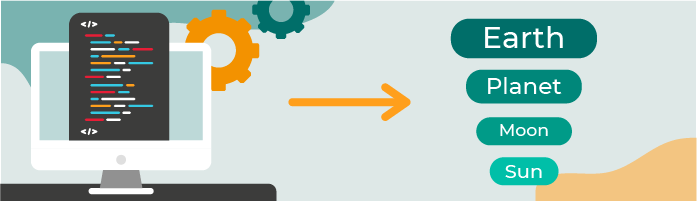

##  Apply Classifier Models for Sentiment Analysis

Sentiment analysis is one of the most common classification applications of vectorization, so we've dedicated a whole chapter to this subject!

The `goal of sentiment analysis` is to classify an opinion as positive or negative.

#### Perform an Ontology-Based Sentiment Analysis

If you google "sentiment analysis in Python," you will at some point stumble upon the `TextBlob library`. It is a simple library that offers many NLP tasks right out of the box, such as tokenization, part-of-speech tagging, language detection, and sentiment analysis. Let's take it for a ride!

In [174]:
!pip install -U textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 11.8 MB/s eta 0:00:0000:01


In [175]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/awf/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /Users/awf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/awf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/awf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/awf/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/awf/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [2]:
from textblob import TextBlob
text = "That was a narrow escape, Alice said. A good deal frightened at the sudden change. But very glad to find herself still in existence;"

blob = TextBlob(text)
for sentence in blob.sentences:
    print(sentence.raw, sentence.sentiment.polarity, sentence.sentiment.subjectivity)

That was a narrow escape, Alice said. -0.2 0.4
A good deal frightened at the sudden change. 0.35 0.55
But very glad to find herself still in existence; 0.65 1.0


TextBlob has correctly identified the first sentence as slightly negative (narrow, escape), and the third one as more positive (glad).

However, the polarity score (0.35) of the second sentence is not great. The score indicates a positive sentence, but Alice is saying that she is a good deal....frightened! Not such a positive statement after all.

What's happening here? Let's try to understand how TextBlob scores the sentence for polarity by looking at some variations of the initial sentenc

In [3]:
def polarity(text):
    polarity_score = TextBlob(text).sentences[0].sentiment.polarity
    print(f"{text} \t {polarity_score}")
    return 

# original sentence, positive
polarity("A good deal frightened at the change.")

# remove 'a good deal', you get neutral
polarity("Frightened at the change.")

# what if we add a negation, and change the noun
polarity("Happy at the change.")

# or add just the word very
polarity("Very frightened at the change.")

A good deal frightened at the change. 	 0.7
Frightened at the change. 	 0.0
Happy at the change. 	 0.8
Very frightened at the change. 	 0.2


TextBlob is looking at the polarity of the adjectives (with some additional rules to handle negations) to calculate the sentence's polarity. Although the word frightened is obviously negative, it is not being taken into account since TextBlob considers it a verb instead of an adjective!

#### Google NPL API

In [183]:
import requests
import json

key = { "key": "<Your API KEY here>"}
data = { 
    "document": {  
        "type":"PLAIN_TEXT", 
        "content":"Alice was very frightened." 
    }, 
    "encodingType":"UTF8" 
}
results = requests.post(url, params=key, json=data)

content = results.content.decode('utf-8')
json.loads(content)['documentSentiment']

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# Vectorize Text for Exploration Using Word Embeddings

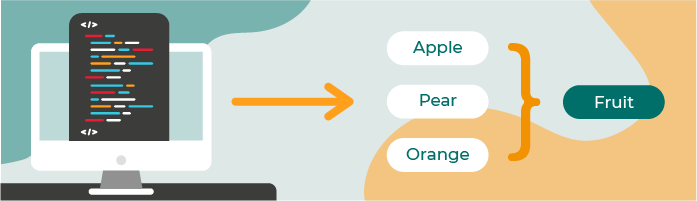

In [184]:
!pip install --upgrade gensim

In [185]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [186]:
import numpy as np
vocab = model.vocab.keys()
np.random.choice(vocab, 5)

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [187]:
# 10 first elements of the book vector
model['book'][:10]

array([ 0.11279297, -0.02612305, -0.04492188,  0.06982422,  0.140625  ,
        0.03039551, -0.04370117,  0.24511719,  0.08740234, -0.05053711],
      dtype=float32)

In [188]:
model.most_similar("book")

[('tome', 0.7485831379890442),
 ('books', 0.7379177808761597),
 ('memoir', 0.7302927374839783),
 ('paperback_edition', 0.6868364214897156),
 ('autobiography', 0.6741527915000916),
 ('memoirs', 0.6505153179168701),
 ('Book', 0.6479282975196838),
 ('paperback', 0.6471226811408997),
 ('novels', 0.6341459155082703),
 ('hardback', 0.6283079981803894)]

In [ ]:
model.most_similar("apple")

In [ ]:
model.similarity("apple", "banana")

model.similarity("apple", "dog")

model.similarity("cat", "dog")

In [190]:
model.most_similar('Thomas')

[('James', 0.6552109718322754),
 ('Joseph', 0.6011841893196106),
 ('Anthony', 0.5971135497093201),
 ('Gregory', 0.5908015966415405),
 ('Francis', 0.5871486663818359),
 ('Frank', 0.5670900940895081),
 ('Bernard', 0.5634328126907349),
 ('Martin', 0.5607891082763672),
 ('Patrick', 0.5592057108879089),
 ('Cho_Channel_NewsAsia', 0.5584686398506165)]

In [189]:
# find all the words starting with 'covid'
start_with = 'covid'
vocab = [tk.lower() for tk in  wv.vocab.keys() if tk.lower()[:len(start_with)] == start_with]
vocab.sort()
vocab

NameError: name 'wv' is not defined

# Train Your First Embedding Models

In [198]:
import urllib
import re

# change to your own path if you have downloaded the file locally
url = 'https://dataskat.s3.eu-west-3.amazonaws.com/data/Shakespeare_alllines.txt'
# read file into list of lines
#lines = urllib.request.urlopen(url).read().decode('utf-8').split("\n")

In [195]:
with open('alllines.txt') as f:
    lines = f.readlines()

In [214]:
lines[:2]

['"ACT I"\n', '"SCENE I. London. The palace."\n']

In [199]:
sentences = []
for line in lines:
    # remove punctuation
    line = re.sub(r'[\!"#$%&\*+,-./:;<=>?@^_`()|~=]','',line).strip()
    
    # tokenizer
    tokens = re.findall(r'\b\w+\b', line)
    if len(tokens) > 1:
        sentences.append(tokens)

In [213]:
sentences[:2]

[['ACT', 'I'], ['SCENE', 'I', 'London', 'The', 'palace']]

In [202]:
from gensim.models import Word2Vec
bard2vec = Word2Vec(
            sentences,
            min_count=3,   # Ignore words that appear less than this
            vector_size=50,       # Dimensionality of word embeddings
            sg = 1,        # skipgrams
            window=7,      # Context window for words during training
            epochs=40)       # Number of epochs training over corpus

In [208]:
bard2vec

In [216]:
#bard2vec.wv.most_similar(word)

In [222]:
bard2vec.wv.most_similar('Thomas')

[('Erpingham', 0.8659687042236328),
 ('Lovell', 0.8032140731811523),
 ('William', 0.7430891990661621),
 ('Brandon', 0.7242740392684937),
 ('LUCY', 0.7191019058227539),
 ('James', 0.7186848521232605),
 ('Gilbert', 0.7150267362594604),
 ('Norfolk', 0.7043910026550293),
 ('Marquis', 0.703395426273346),
 ('chancellor', 0.7006714940071106)]

In [223]:
bard2vec.wv.most_similar('husband')

[('mistress', 0.7967166304588318),
 ('master', 0.7619701623916626),
 ('son', 0.7412595748901367),
 ('wife', 0.7376664280891418),
 ('mother', 0.7277107238769531),
 ('Lucio', 0.6952322125434875),
 ('father', 0.6890304088592529),
 ('Katharina', 0.6789610981941223),
 ('puppy', 0.6755776405334473),
 ('daughter', 0.6738824844360352)]

In [224]:
!pip install glove_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 5.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      /Users/awf/opt/anaconda3/lib/python3.9/site-packages/setuptools/dist.py:771: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-39
      creating build/lib.macosx-10.9-x86_64-cpython-39/glove
      copying glove/__init__.py -> build/lib.macosx-10.9-x86_64-cpython-39/glove
      copying glove/glove.py -> build/lib.macosx-10.9-x86_64-cpython-39/glove
      copying glove/corpus.py -> build/lib.macosx-10.9-x86_64-cpython-39/glove
      running build_

In [225]:
from glove import Corpus, Glove # creating a corpus object

# instantiate the corpus
corpus = Corpus() 

# this will create the word co occurence matrix 
corpus.fit(sentences, window=10)

# instantiate the model
glove = Glove(no_components=50, learning_rate=0.05)

# and fit over the corpus matrix
glove.fit(corpus.matrix, epochs=30, no_threads=2)

# finally we add the vocabulary to the model
glove.add_dictionary(corpus.dictionary)

ModuleNotFoundError: No module named 'glove'

# Bonus! Doing More with SpaCy

In [226]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("If you don’t know where you are going any road can take you there.")

for token in doc:
    print(f"{token.text}\t {token.pos_} ")

If	 SCONJ 
you	 PRON 
do	 AUX 
n’t	 PART 
know	 VERB 
where	 SCONJ 
you	 PRON 
are	 AUX 
going	 VERB 
any	 DET 
road	 NOUN 
can	 AUX 
take	 VERB 
you	 PRON 
there	 ADV 
.	 PUNCT 


In [227]:
doc = nlp("Grace me no grace, nor uncle me no uncle")
for t in doc: print(t, t.pos_)

Grace VERB
me PRON
no DET
grace NOUN
, PUNCT
nor CCONJ
uncle VERB
me PRON
no DET
uncle NOUN


In [230]:
import nltk
nltk.download('universal_tagset')
text1 = nltk.word_tokenize("Grace me no grace, nor uncle me no uncle")
nltk.pos_tag(text1,tagset='universal')
# ADP here is an Adposition (it's complicated)

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/awf/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


[('Grace', 'NOUN'),
 ('me', 'PRON'),
 ('no', 'DET'),
 ('grace', 'NOUN'),
 (',', '.'),
 ('nor', 'CONJ'),
 ('uncle', 'ADP'),
 ('me', 'PRON'),
 ('no', 'DET'),
 ('uncle', 'NOUN')]

In [232]:
import requests
import spacy
nlp = spacy.load("en_core_web_sm")
r = requests.get('http://www.gutenberg.org/files/11/11-0.txt')
doc = nlp(r.text.split("*** END")[0])

In [234]:
#doc

In [235]:
# collect all the entities that are tagged PERSON
persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
# and list the 12 most common ones
Counter(persons).most_common(12)

[('Dormouse', 22),
 ('Alice', 21),
 ('â\x80\x9cif', 6),
 ('Bill', 5),
 ('Queen', 5),
 ('Hatter', 5),
 ('William', 4),
 ('Footman', 4),
 ('Mabel', 3),
 ('Mouse', 3),
 ('Billâ\x80\x99s', 3),
 ('Panther', 3)]

In [236]:
rabbit_ner = [(ent.text, ent.label_) for ent in doc.ents if "Rabbit" in ent.text]
Counter(rabbit_ner).most_common(10)

[(('the White Rabbit', 'FAC'), 7),
 (('Rabbit', 'FAC'), 2),
 (('Rabbitâ\x80\x99s', 'PERSON'), 2),
 (('The Rabbit Sends in a Little', 'WORK_OF_ART'), 1),
 (('Rabbitâ\x80\x99s', 'ORG'), 1),
 (('White Rabbit', 'ORG'), 1),
 (('the White\r\nRabbit', 'LAW'), 1),
 (('the White Rabbit', 'ORG'), 1)]

In [237]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "The nitrogen in our DNA, the calcium in our teeth, the iron in our blood, the carbon in our apple pies were made in the interiors of collapsing stars. We are made of starstuff."

doc = nlp(text)

vocab = []
for token in doc:
    if token.pos_ == "VERB":
        vocab.append(token.lemma_)
vocab

['make', 'collapse', 'make']